Device: cuda
Linear(in_features=512, out_features=307200, bias=True)


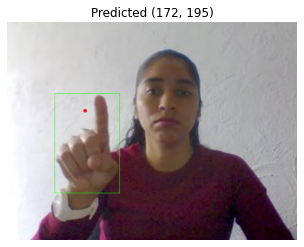

Device: cuda


In [1]:
import numpy as np
import torch
import torchvision.models as models
import torch.nn as nn
import cv2

import visualizer
import fingertip_finder

from PIL import Image
from dataloader import unnormalize

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

In [2]:
# test with static training data
testimg = np.array(Image.open('training_data/color/color_img0000046.jpg'))

cap = cv2.VideoCapture(0)
cv2.startWindowThread()
# window should pop up
while True:
    check, frame = cap.read()
    frame = testimg.copy()
    prediction, fingertip_coor = fingertip_finder.find_fingertip(testimg.copy())
    #img = unnormalize(img).permute(1, 2, 0).numpy()
    #output = output.numpy().astype(np.float32)

    try:
        # show pre-processed and unnormalized input image as video feed
        cv2.imshow('img', testimg)

        # show output as video feed
        cv2.imshow('output', prediction)
        
    except Exception as e:
        print(e)
        break
        
    key = cv2.waitKey(1)
    
    # break video capture when esc is pressed
    if key == 27:
        break
# release webcam and close the windows
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [3]:
# access webcam using opencv
# Reference: https://medium.com/@unknown.underme/opening-webcam-using-opencv-257ac258e217

cap = cv2.VideoCapture(0)

# window should pop up
while True:
    check, frame = cap.read()
    prediction, coor = fingertip_finder.find_fingertip(frame.copy())
    #output = output.numpy().astype(np.float32)

    try:
        # show pre-processed and unnormalized input image as video feed
        cv2.imshow('img', frame)

        # show output as video feed
        cv2.imshow('output', prediction)
        
    except Exception as e:
        print(e)
        break
        
    key = cv2.waitKey(1)
    
    # break video capture when esc is pressed
    if key == 27:
        break

# release webcam and close the windows
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1